In [7]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl 

    100% |████████████████████████████████| 496.4MB 27.6MB/s 


In [8]:
!pip3 install torchvision

    100% |████████████████████████████████| 51kB 1.8MB/s 
    100% |████████████████████████████████| 5.9MB 234kB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [9]:
!pip install Pillow==4.0.0

    100% |████████████████████████████████| 5.6MB 239kB/s 
  Found existing installation: Pillow 5.0.0
    Uninstalling Pillow-5.0.0:
      Successfully uninstalled Pillow-5.0.0


In [ ]:
import torch

In [ ]:
import numpy as np
from torchvision import datasets, transforms
import torchvision
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn as nn
import os
from PIL import Image
from torch.autograd import Variable

In [12]:
model = torchvision.models.inception_v3(pretrained=True)   # import the pre-trained inception v3 model

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /content/.torch/models/inception_v3_google-1a9a5a14.pth
5.1%100.0%


In [ ]:
for param in model.parameters():
    param.requires_grad = False      # only the final layer is to be trained, hence their gradient is not required

In [ ]:
num_features = model.fc.in_features
model.fc = nn.Linear(num_features,2)   # new no. of classes is 2 

In [17]:
use_gpu = torch.cuda.is_available()
print(use_gpu)
if use_gpu:
    model = model.cuda()       # using GPU for processing

True


In [ ]:
class Preprocess(object):    # the images in the train set are read in PIL format and the resized and converted to Tensors
    """Resize and convert PIL images to to Tensors."""

    def __call__(self, sample):
        image = sample

        image = image.resize((299,299),Image.NEAREST)
        image = np.array(image,dtype='float32')
        image = image.transpose()
        image = torch.from_numpy(image)
        return image


In [ ]:
data_transform = transforms.Compose([    # the transform class to apply to each of the image being read
        Preprocess()
])

In [20]:
!wget https://raw.githubusercontent.com/nexus-kgp/transfer-learning-inception-v3/master/train_image.tar.gz

--2018-03-01 18:27:00--  https://raw.githubusercontent.com/nexus-kgp/transfer-learning-inception-v3/master/train_image.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1914880 (1.8M) [application/octet-stream]
Saving to: ‘train_image.tar.gz’

train_image.tar.gz  100%[===================>]   1.83M  6.38MB/s    in 0.3s    

2018-03-01 18:27:01 (6.38 MB/s) - ‘train_image.tar.gz’ saved [1914880/1914880]



In [21]:
!wget https://raw.githubusercontent.com/nexus-kgp/transfer-learning-inception-v3/master/test_image.tar.gz

--2018-03-01 18:27:16--  https://raw.githubusercontent.com/nexus-kgp/transfer-learning-inception-v3/master/test_image.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 829440 (810K) [application/octet-stream]
Saving to: ‘test_image.tar.gz’

test_image.tar.gz   100%[===================>] 810.00K  --.-KB/s    in 0.1s    

2018-03-01 18:27:16 (6.78 MB/s) - ‘test_image.tar.gz’ saved [829440/829440]



In [22]:
!tar xvf train_image.tar.gz

train_image/
train_image/socks/
train_image/socks/n03026506_229.JPEG
train_image/socks/n03026506_382.JPEG
train_image/socks/n03026506_319.JPEG
train_image/socks/n03026506_181.JPEG
train_image/socks/n03026506_193.JPEG
train_image/socks/n03026506_374.JPEG
train_image/socks/n03026506_240.JPEG
train_image/socks/n03026506_277.JPEG
train_image/socks/n03026506_234.JPEG
train_image/socks/n03026506_167.JPEG
train_image/socks/n03026506_315.JPEG
train_image/socks/n03026506_321.JPEG
train_image/socks/n03026506_455.JPEG
train_image/socks/n03026506_173.JPEG
train_image/socks/n03026506_460.JPEG
train_image/socks/n03026506_258.JPEG
train_image/socks/n03026506_442.JPEG
train_image/socks/n03026506_282.JPEG
train_image/socks/n03026506_158.JPEG
train_image/socks/n03026506_497.JPEG
train_image/socks/n03026506_192.JPEG
train_image/socks/n03026506_326.JPEG
train_image/socks/n03026506_463.JPEG
train_image/socks/n03026506_464.JPEG
train_image/socks/n03026506_439.JPEG
train_image/socks/n03026506_293.JPEG
train_

In [23]:
!tar xvf test_image.tar.gz

test_image/
test_image/socks/
test_image/socks/n03026506_74.JPEG
test_image/socks/n03026506_48.JPEG
test_image/socks/n03026506_67.JPEG
test_image/socks/n03026506_34.JPEG
test_image/socks/n03026506_88.JPEG
test_image/socks/n03026506_28.JPEG
test_image/socks/n03026506_153.JPEG
test_image/socks/n03026506_99.JPEG
test_image/socks/n03026506_109.JPEG
test_image/socks/n03026506_138.JPEG
test_image/socks/n03026506_39.JPEG
test_image/socks/n03026506_55.JPEG
test_image/socks/n03026506_91.JPEG
test_image/socks/n03026506_128.JPEG
test_image/socks/n03026506_44.JPEG
test_image/socks/n03026506_36.JPEG
test_image/socks/n03026506_92.JPEG
test_image/socks/n03026506_10.JPEG
test_image/socks/n03026506_30.JPEG
test_image/socks/n03026506_133.JPEG
test_image/socks/n03026506_145.JPEG
test_image/socks/n03026506_49.JPEG
test_image/socks/n03026506_135.JPEG
test_image/socks/n03026506_8.JPEG
test_image/socks/n03026506_70.JPEG
test_image/socks/n03026506_130.JPEG
test_image/socks/n03026506_32.JPEG
test_image/socks/n

In [ ]:
tiny_dataset = datasets.ImageFolder(root='train_image',transform=data_transform)  
img_dataset = {'train':tiny_dataset}
dataset_loader = torch.utils.data.DataLoader(tiny_dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)
dataloaders = {'train':dataset_loader}

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001) #momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [ ]:
dataset_sizes = {'train':700}

In [ ]:
import time

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    losses = []
    since = time.time()
    best_model_wts = model.state_dict()
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # Each epoch has a training and validation phase
        for phase in ['train']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data
            
                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
            
                _, preds = torch.max(outputs[0], 1)
                loss = criterion(outputs[0], labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels).data[0]

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            losses.append(epoch_loss)
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'train' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, losses

In [47]:
model, losses2 = train_model(model, criterion, optimizer,exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.0726 Acc: 0.8814

Epoch 1/24
----------
train Loss: 0.0728 Acc: 0.8800

Epoch 2/24
----------
train Loss: 0.0754 Acc: 0.8757

Epoch 3/24
----------
train Loss: 0.0743 Acc: 0.8686

Epoch 4/24
----------
train Loss: 0.0814 Acc: 0.8600

Epoch 5/24
----------
train Loss: 0.0655 Acc: 0.8957

Epoch 6/24
----------
train Loss: 0.0735 Acc: 0.8700

Epoch 7/24
----------
train Loss: 0.0641 Acc: 0.9000

Epoch 8/24
----------
train Loss: 0.0881 Acc: 0.8543

Epoch 9/24
----------
train Loss: 0.0690 Acc: 0.8929

Epoch 10/24
----------
train Loss: 0.0759 Acc: 0.8671

Epoch 11/24
----------
train Loss: 0.0731 Acc: 0.8743

Epoch 12/24
----------
train Loss: 0.0716 Acc: 0.8729

Epoch 13/24
----------
train Loss: 0.0728 Acc: 0.8657

Epoch 14/24
----------
train Loss: 0.0735 Acc: 0.8729

Epoch 15/24
----------
train Loss: 0.0623 Acc: 0.8957

Epoch 16/24
----------
train Loss: 0.0652 Acc: 0.8929

Epoch 17/24
----------
train Loss: 0.0700 Acc: 0.8857

Epoch 18/24
--------

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

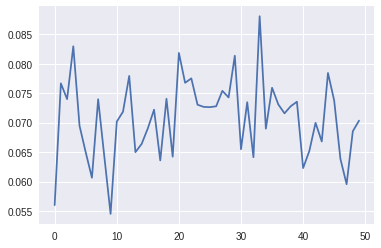

In [49]:
plt.plot(losses + losses2)  # 50 epochs